# Module 4 : Performance measurements of  DecisionTree:

In [2]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import numpy as n
import seaborn as sns

In [3]:
data = p.read_csv("demo.csv")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data.head(5)

,Unnamed: 0,STATE_UT_NAME,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood,Avg_june10days,maytojune
0,0,ANDAMAN And NICOBAR ISLANDS,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,...,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1,0,98.500000,63.0
1,1,ANDAMAN And NICOBAR ISLANDS,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,...,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3,0,152.400000,82.8
2,2,ANDAMAN And NICOBAR ISLANDS,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,...,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7,0,167.766667,159.7
3,3,ARUNACHAL PRADESH,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,...,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0,0,149.000000,140.6
4,4,ARUNACHAL PRADESH,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,...,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1,1,246.100000,415.3


In [6]:
data.tail()

,Unnamed: 0,STATE_UT_NAME,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood,Avg_june10days,maytojune
636,636,KERALA,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,...,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2,0,217.200000,419.0
637,637,KERALA,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,...,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9,1,333.200000,782.0
638,638,KERALA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,...,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2,0,185.633333,262.2
639,639,KERALA,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,...,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5,1,232.700000,523.5
640,640,LAKSHADWEEP,20.8,14.7,11.8,48.9,171.7,330.2,287.7,217.5,...,117.7,58.8,1600.0,35.5,232.4,998.5,333.6,0,110.066667,158.5


In [7]:
data["flood"].value_counts()

1    376
0    265
Name: flood, dtype: int64

In [8]:
data.isnull().sum()

Unnamed: 0        0
STATE_UT_NAME     0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUAL            0
Jan-Feb           0
Mar-May           0
Jun-Sep           0
Oct-Dec           0
flood             0
Avg_june10days    0
maytojune         0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Unnamed: 0', 'STATE_UT_NAME', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec', 'flood', 'Avg_june10days',
       'maytojune'],
      dtype='object')

In [11]:
data.shape

(641, 22)

In [12]:
del data['JAN']
del data['Unnamed: 0']
del data['FEB']
del data['MAR']
del data['APR']
del data['MAY']
del data['JUN']
del data['JUL']
del data['AUG']
del data['SEP']
del data['OCT']
del data['NOV']
del data['DEC']
del data['Avg_june10days']
del data['maytojune']

In [13]:
data.head()

,STATE_UT_NAME,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood
0,ANDAMAN And NICOBAR ISLANDS,2805.2,165.2,540.7,1207.2,892.1,0
1,ANDAMAN And NICOBAR ISLANDS,3015.7,69.7,483.5,1757.2,705.3,0
2,ANDAMAN And NICOBAR ISLANDS,2913.3,48.6,405.6,1884.4,574.7,0
3,ARUNACHAL PRADESH,3043.8,123.0,841.3,1848.5,231.0,0
4,ARUNACHAL PRADESH,4034.7,112.8,645.4,3008.4,268.1,1


In [14]:
from sklearn.preprocessing import LabelEncoder

var_mod=["STATE_UT_NAME"]
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i]).astype(int)

In [15]:
data.head()

,STATE_UT_NAME,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood
0,0,2805.2,165.2,540.7,1207.2,892.1,0
1,0,3015.7,69.7,483.5,1757.2,705.3,0
2,0,2913.3,48.6,405.6,1884.4,574.7,0
3,2,3043.8,123.0,841.3,1848.5,231.0,0
4,2,4034.7,112.8,645.4,3008.4,268.1,1


In [16]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [17]:
X = data.drop(labels='flood', axis=1)
#Response variable
y = data.loc[:,'flood']    

In [18]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

DecisionTree:


Classification report DecisionTree classifier Results:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        80
           1       0.99      0.94      0.96       113

    accuracy                           0.96       193
   macro avg       0.95      0.96      0.96       193
weighted avg       0.96      0.96      0.96       193


Accuracy result of DecisionTree  is: 95.85492227979275

Confusion Matrix result of DecissionTree Classifier is:
 [[ 79   1]
 [  7 106]]

Sensitivity :  0.9875

Specificity :  0.9380530973451328

Cross validation test results of accuracy:
[0.57364341 0.8984375  0.6328125  0.765625   0.6171875 ]

Accuracy result of DecisionTree Classifier is: 69.75411821705426


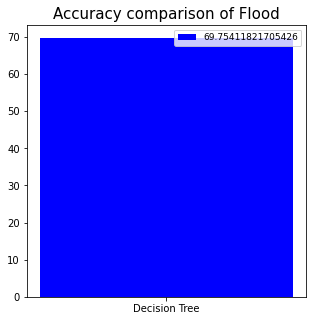

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT=DecisionTreeClassifier()

DT.fit(X_train,y_train)

predictDT = DT.predict(X_test)

print("")
print('Classification report DecisionTree classifier Results:')
print("")
print(classification_report(y_test,predictDT))

print("")
x = (accuracy_score(y_test,predictDT)*100)

print('Accuracy result of DecisionTree  is:', x)
print("")

cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of DecissionTree Classifier is:\n',cm2)
print("")
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )
print("")
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)
print("")

accuracy = cross_val_score(DT, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of DecisionTree Classifier is:",accuracy.mean() * 100)
dt=accuracy.mean() * 100




def graph():
    import matplotlib.pyplot as plt
    data=[dt]
    alg="Decision Tree"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Flood",fontsize=15)
    plt.legend(b,data,fontsize=9)




graph()

True Positive : 106
True Negative : 7
False Positive : 1
False Negative : 79

True Positive Rate : 0.572972972972973
True Negative Rate : 0.875
False Positive Rate : 0.125
False Negative Rate : 0.42702702702702705

Positive Predictive Value : 0.9906542056074766
Negative predictive value : 0.08139534883720931
[[ 79   1]
 [  7 106]]


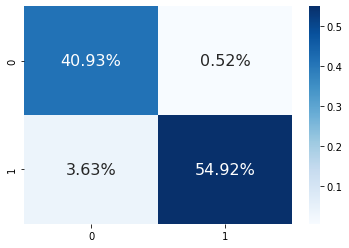

In [20]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, predictDT)
print(cm2)
sns.heatmap(cm2/n.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16}, fmt='.2%',)
plt.show()